### try to predict the Iris flower species using only two attributes: sepal width and sepal length
### assign a label (a value taken from a discrete set) to an item according to its features

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [26]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

#From dataset take first 2 attributes
X, y = X_iris[:, :2], y_iris

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

## Scaling
#### for each feature, calculate the average, subtract the mean value from the feature value, and divide the result by their standard deviation
#### after scaling - each feature will have a zero average, with a standard deviation of one
#### avoid that features with large values may weight too much on the final results

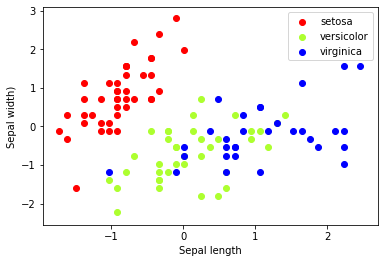

In [27]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

colors = ['red', 'greenyellow', 'blue']

for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
    plt.legend(iris.target_names)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width)')

In [28]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,  y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
print(clf.coef_)

[[-20.91702279  11.87429205]
 [ -1.73789117  -6.22420623]
 [  6.48336128  -1.05956724]]


in the real plane, with these three values, we can draw a line, represented by the following equation:
-16.71428252 - 23.46840475 * x1 + 10.9460819 * x2 = 0

In [30]:
print(clf.intercept_)

[-11.20963568   0.6914121   -1.03428506]


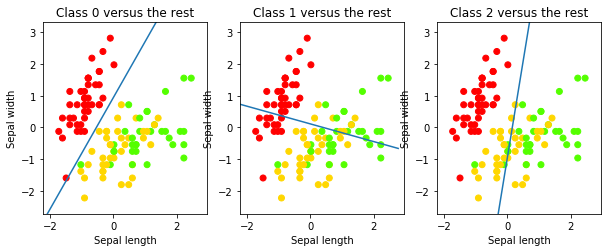

In [31]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)

for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

suppose that we have a new flower with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class

In [32]:
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


Our prediction procedure combines the result of the three binary classifiers and selects the class in which it is more confident



In [33]:
from sklearn import metrics

In [34]:
y_train_pred = clf.predict(X_train)
acc_train = metrics.accuracy_score(y_train, y_train_pred)
print('Accuracy of my classifier on training data is: ', acc_train * 100, '%')

y_test_pred = clf.predict(X_test)
acc_test = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy of my classifier on testing data is: ', acc_test * 100, '%')



Accuracy of my classifier on training data is:  84.82142857142857 %
Accuracy of my classifier on testing data is:  65.78947368421053 %


In [35]:
print(metrics.classification_report(y_test, y_test_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      0.45      0.43        11
   virginica       0.67      0.63      0.65        19

    accuracy                           0.66        38
   macro avg       0.69      0.70      0.69        38
weighted avg       0.66      0.66      0.66        38



The classifier obtained 1.0 precision and recall in the setosa class. That means 100 percent of the instances that are classified as setosa are really setosa instances. 
For recall - 100 percent of the setosa instances were classified as setosa

#### confusion matrix

In [36]:
print(metrics.confusion_matrix(y_test, y_test_pred))

[[ 8  0  0]
 [ 0  5  6]
 [ 0  7 12]]


My classifier is never wrong in our evaluation set when it classifies class 0 (setosa) flowers. But, when it faces classes 1 and 2 flowers (versicolor and virginica), it confuses them

### CROSS-VALIDATION
1. Partition the dataset into k different subsets.
2. Create k different models by training on k-1 subsets and testing on the
remaining subset.
3. Measure the performance on each of the k models and take the average measure.

We will chose to have k = 5 folds, so each time we will train on 80 percent of the
data and test on the remaining 20 percent.
Cross-validation, by default, uses accuracy as its performance measure

In [37]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

create a composite estimator made by a pipeline of the standarization and the linear model

In [38]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_model', SGDClassifier())
])

create a k-fold cross validation iterator of k=5 folds

In [39]:
cv = KFold(X.shape[0], shuffle=True, random_state=33)

by default the score used is the one returned by score method of the estimator (accuracy)

In [40]:
scores = cross_val_score(clf, X, y, cv=cv)
print(scores)

[1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1.]


In [41]:
from scipy.stats import sem
def mean_score(scores):
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores))

print(mean_score(scores))

Mean score: 0.733 (+/-0.036)
